In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2,baselinish3,complex_pokemon_model3

from cs231n.data_utils import load_CIFAR10

In [2]:
def show_images2(images):
    images = np.reshape(images, [images.shape[0], -1])
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]),cmap = plt.get_cmap('gray'))
    return

In [3]:
def show_images(images):
    images = np.reshape(images, [images.shape[0], -1,3])
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg,3]))
    return

Training data shape:  (50000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


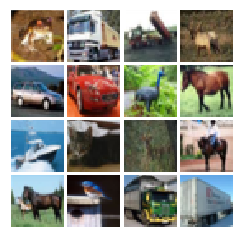

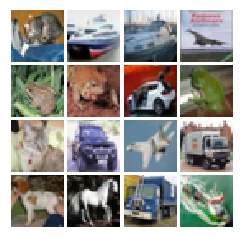

In [4]:
# Load the raw CIFAR-10 data.
from skimage import img_as_float
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)
X_train = img_as_float(X_train.astype('uint8'))
X_test = img_as_float(X_test.astype('uint8'))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
show_images(X_train[:16])
show_images(X_test[:16])

In [51]:
tf.reset_default_graph()

Y = tf.placeholder(tf.uint8 ,[None , 64,64,3])

is_training = tf.placeholder(tf.bool)

print (y_train.shape)

with tf.variable_scope("model") as scope:
    #hsv_out,rgb_out,hsv_in,rgb_in = baselinish2(Y,is_training)
    hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(rgb_out-rgb_in))
    
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate = 0.01
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           100, 0.98, staircase=True)
# Passing global_step to minimize() will increment it at each step.
    train_step = (tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step))
    #optimiser = tf.train.AdamOptimizer(1e-3)
    #train_step = optimiser.minimize(loss)


sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess,'../models/image_net_pok_model_trained/new_model')
import matplotlib.pyplot as plt
import numpy.random as rnd

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


rand_indices = np.random.choice(100,48)
samp = y_train[rand_indices]

feed_dict = {Y:samp,is_training:True}
losses,rgb_o,rgb_i = sess.run([loss,rgb_out,rgb_in],feed_dict)
print (losses)
show_images(rgb2gray(rgb_i[0]),gray = True)
show_images(rgb_o[0])
show_images(rgb_i[0])

    

(50000,)
INFO:tensorflow:Restoring parameters from ../models/image_net_pok_model_trained/new_model


INFO:tensorflow:Restoring parameters from ../models/image_net_pok_model_trained/new_model


ValueError: Cannot feed value of shape (48,) for Tensor 'Placeholder:0', which has shape '(?, 64, 64, 3)'

In [ ]:
print(rgb_i.size)
print(rgb_o[0].size)
auc, ans = AUC(np.reshape(rgb_i, [48, 64, 64, 3]), np.reshape(rgb_o, [48, 64, 64, 3]))
print(ans)

plt.plot(np.arange(0., 0.5, 0.5/256), auc)
plt.plot(np.arange(0., 0.5, 0.5/256), 1-auc)

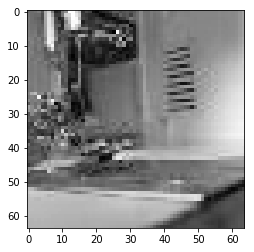

(196608, 3)


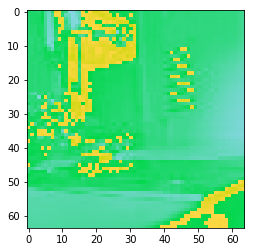

In [6]:
converter = np.array([[0.299,0.587,0.114],[-0.14713,-0.2888,0.436],
                                  [0.615,-0.514999,-0.10001]])
grayscale = np.reshape(rgb_i, [48*64*64, 3]).dot(converter)
grayscale[:,1:3] = -0.1
grayscale_vis = np.reshape(grayscale,[48,64,64,3])
show_images(grayscale_vis[0,:,:,0],gray = True)
inv_mat  = np.array([[1,0,1.13983],[1,-0.39465,-0.58060],[1,2.03211,0]])
rgb_gray = grayscale.dot(inv_mat)
print(rgb_gray.shape)
rgb_gray = np.reshape(rgb_gray, [48,64,64,3])
#print(np.reshape(rgb_gray, [48,64,64,3]).shape)
show_images(rgb_gray[0])

0.701299263371


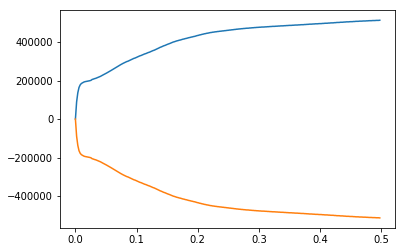

In [7]:
auc, ans = AUC(np.reshape(rgb_i, [48, 64, 64, 3]), np.reshape(rgb_gray, [48, 64, 64, 3]))
print(ans)

plt.plot(np.arange(0., 0.5, 0.5/256), auc)
plt.plot(np.arange(0., 0.5, 0.5/256), 1-auc)

In [6]:
def show_images(images,gray = False):
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);
    plt.show()

0
1.07064


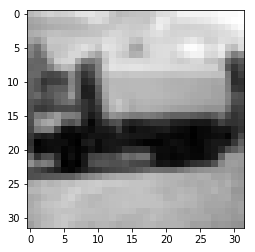

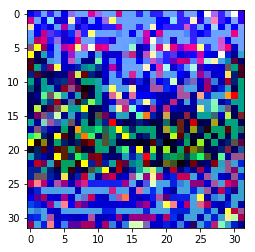

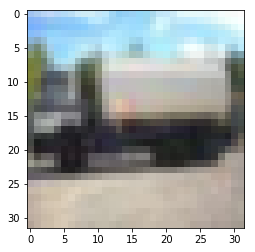

In [ ]:
from Loss_metrics import Prob_dist, YUV2rgb
from skimage import img_as_float

tf.reset_default_graph()

X = tf.placeholder(tf.float32 ,[None ,32,32,3])
Y = tf.placeholder(tf.float32,[None,32,32,400])
is_training = tf.placeholder(tf.bool)

#print (Y_train.shape)

with tf.variable_scope("model") as scope:
    UV_out,Y_in,UV_in = complex_pokemon_model3(X,is_training)
    reshaped_Y = tf.reshape(Y,shape = [-1,400])
    reshaped_UV_out = tf.reshape(UV_out,shape = [-1,400])
    loss_temp = tf.nn.softmax_cross_entropy_with_logits(logits = reshaped_UV_out,labels = reshaped_Y )
    weight = tf.exp(-tf.sqrt(tf.reduce_sum(tf.square(UV_in), 3)))
    loss_reshaped = tf.reshape(loss_temp,[-1,32,32])
    loss = tf.reduce_mean(weight*loss_reshaped)
    #loss = tf.reduce_mean(loss)
    train_step = (tf.train.AdamOptimizer(1e-3).minimize(loss))

sess = tf.Session()
saver = tf.train.Saver()
#saver.restore(sess,'../models/image_net_pok_model_trained/new_model')

import numpy.random as rnd

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


yuv_converter = np.array([[0.299,0.587,0.114],[-0.14713,-0.2888,0.436],
                                  [0.615,-0.514999,-0.10001]])
inv_mat  = np.array([[1,0,1.13983],[1,-0.39465,-0.58060],[1,2.03211,0]])

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(10000):
    rand_indices = np.random.choice(50000,32,replace = False)
    samp = X_train[rand_indices]
    
    samp_float = img_as_float(samp)
    samp_YUV = samp_float.dot(yuv_converter)
    samp_rgb = samp_YUV.dot(inv_mat)
    prob_dist_batch = Prob_dist(samp_YUV)
    feed_dict = {X:samp, Y:prob_dist_batch, is_training:True}
    losses,UV_o,y_in,_ = sess.run([loss,UV_out,Y_in,train_step],feed_dict)
    RGB_output = YUV2rgb(UV_o, y_in)
    ### SUper chutiyaapa 0.025
     
    if(i%200==0):    
        print(i)
        saver.save(sess,'../models/class_model/mod')
        print (losses)
        show_images(rgb2gray(samp[0]),gray = True)
        show_images(RGB_output[0])
        show_images(samp[0])

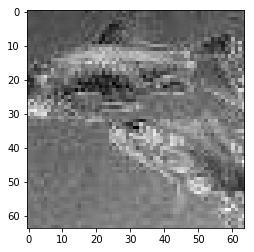

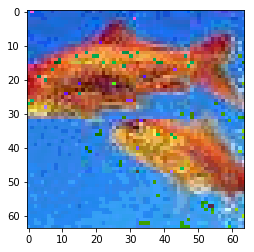

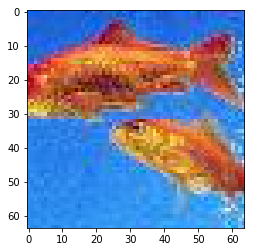

0.725904788227


In [24]:
auc, ans = AUC(np.reshape(rgb_i, [48, 64, 64, 3]), np.reshape(rgb_gray, [48, 64, 64, 3]))
print(ans)

plt.plot(np.arange(0., 0.5, 0.5/256), auc)
plt.plot(np.arange(0., 0.5, 0.5/256), 1-auc)

show_images(rgb2gray(samp[0]),gray = True)
show_images(RGB_output[0])
show_images(samp[0])

print(np.amax(samp_float[0]-RGB_output[0]))